<a href="https://colab.research.google.com/github/olfabre/DataMaining_Master_2/blob/main/tp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Q1-01 - **chargement** du fichier fruit_data_with_colors.txt avec Panda

In [24]:
from google.colab import files
uploaded = files.upload()

# Q1-02 - lecture Panda, afficher toutes les lignes

In [ ]:
import pandas as pd

# Lire le fichier
fruits = pd.read_table('fruit_data_with_colors.txt')

# Afficher toutes les lignes
pd.set_option('display.max_rows', None)
print(fruits)

    fruit_label fruit_name     fruit_subtype  mass  width  height  color_score
0             1      apple      granny_smith   192    8.4     7.3         0.55
1             1      apple      granny_smith   180    8.0     6.8         0.59
2             1      apple      granny_smith   176    7.4     7.2         0.60
3             2   mandarin          mandarin    86    6.2     4.7         0.80
4             2   mandarin          mandarin    84    6.0     4.6         0.79
5             2   mandarin          mandarin    80    5.8     4.3         0.77
6             2   mandarin          mandarin    80    5.9     4.3         0.81
7             2   mandarin          mandarin    76    5.8     4.0         0.81
8             1      apple          braeburn   178    7.1     7.8         0.92
9             1      apple          braeburn   172    7.4     7.0         0.89
10            1      apple          braeburn   166    6.9     7.3         0.93
11            1      apple          braeburn   172  

# Q1-03 - combien d'attributs ?

In [ ]:
print("Nombre d'attributs :", fruits.shape[1])

Nombre d'attributs : 7


Q1-04 - Quels sont les attributs ?

In [ ]:
print("Noms des attributs :")
print(fruits.columns.tolist())

Noms des attributs :
['fruit_label', 'fruit_name', 'fruit_subtype', 'mass', 'width', 'height', 'color_score']


Q1-05 - ques sont leurs types ?

In [ ]:
print("Types des attributs :")
print(fruits.dtypes)

Types des attributs :
fruit_label        int64
fruit_name        object
fruit_subtype     object
mass               int64
width            float64
height           float64
color_score      float64
dtype: object


Q1-06 - Quel est le nombre d'instances ?

In [ ]:
print("Nombre d'instances :", fruits.shape[0])

Nombre d'instances : 59


Q1-07 - répartition des instances par classe

In [ ]:
print("Répartition des classes :")
print(fruits['fruit_name'].value_counts())

Répartition des classes :
fruit_name
apple       19
orange      19
lemon       16
mandarin     5
Name: count, dtype: int64


## **Q2**

Q2 - 1 diagramme de dispersion (scatter matrix) entre les variables

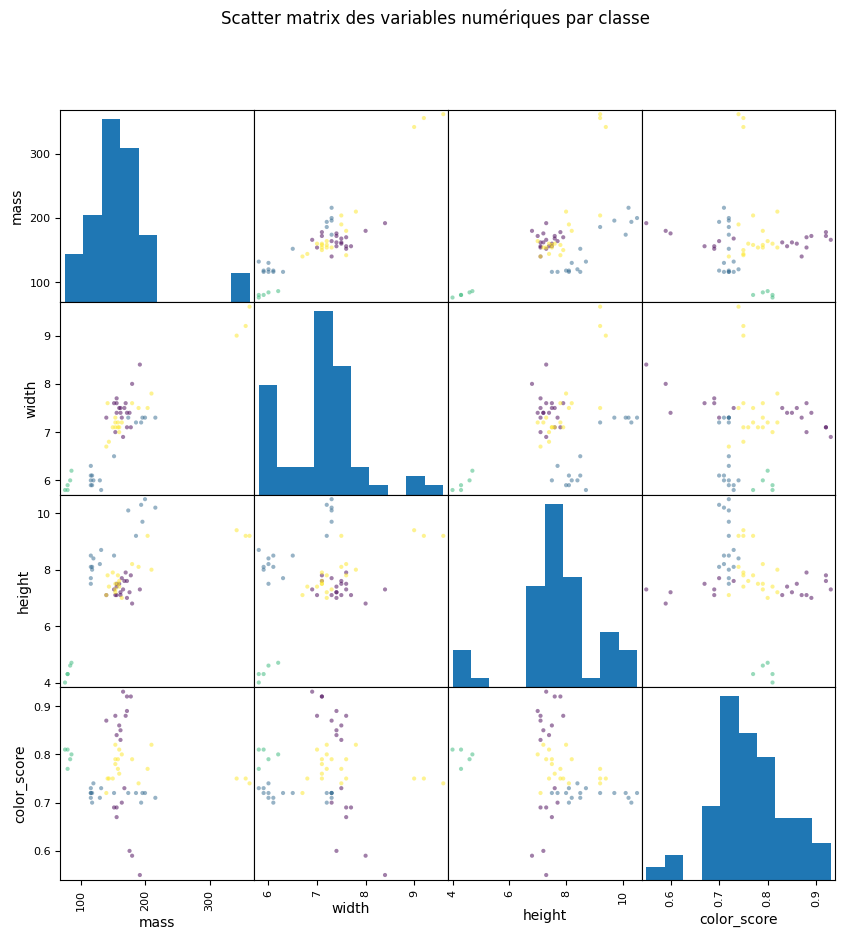

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# on prepare les données
# lecture fichier
fruits = pd.read_table('fruit_data_with_colors.txt')

# Variables numériques
feature_names = ['mass', 'width', 'height', 'color_score']
X = fruits[feature_names]
plt.show()

on va fixer les couleurs
- **Citron** = jaune
- **Pomme** = vert
- **Orange** = orange
- **Mandarine** = rouge



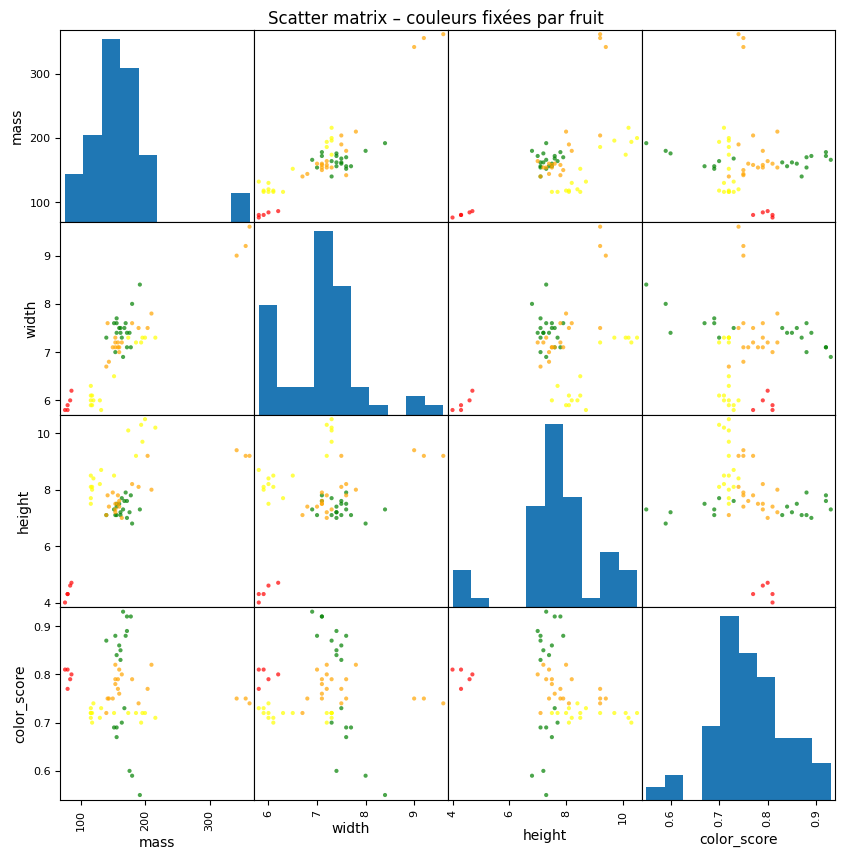

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# on prepare les données
# lecture fichier
fruits = pd.read_table('fruit_data_with_colors.txt')

# --- 1. Mapping explicite fruit → couleur ---
color_map = {
    'lemon'    : 'yellow',   # citron
    'apple'    : 'green',    # pomme
    'orange'   : 'orange',   # orange
    'mandarin' : 'red'       # mandarine
}

# Variables numériques
feature_names = ['mass', 'width', 'height', 'color_score']
X = fruits[feature_names]
# --- 2. Créer une liste de couleurs dans le même ordre que le DataFrame ---
colors = fruits['fruit_name'].map(color_map)

# --- 3. Dessiner la matrice en passant la liste de couleurs ---
scatter_matrix(fruits[['mass', 'width', 'height', 'color_score']],
               c=colors,           # ici on impose les couleurs
               figsize=(10, 10),
               alpha=0.7,
               diagonal='hist')
plt.suptitle('Scatter matrix – couleurs fixées par fruit', y=0.9)
plt.show()

## **Q3** - Clustering

Le clustering peut être vu comme une méthode non supervisée qui cherche à regrouper les instances qui se ressemblent, le plus souvent après avoir fixé au préalable un certain nombre de groupes (ou clusters) à construire.

Plusieurs algorithmes de clustering sont disponibles dans scikit-learn. Dans cette séance, deux méthodes de clustering seront testées : l'une classique est basée sur l'algorithme de partionnement des données K-means et est désignée par KMeans, l'autre est une méthode hiérarchique ascendante produisant un arbre donnant la proximité entre les instances et est appelée AgglomerativeClustering (pour ce dernier modèle, nous utiliserons en réalité des méthodes de bibliothèque scipy puisque nous nous contenterons d'un affichage)

Q3-01 - K-means : regrouper les fruits « qui se ressemblent »

Ce que je dois faire:

- Je normalise les données (toutes les colonnes numériques)
- Je lance K-means avec 3, 4 puis 5 groupes
- Je regarde à la main ce que contient chaque groupe
- Je dis quel fruit est dans quel groupe

Explication KMeans:

Chaque fruit est un point dans l'espace en 3 dimension : axe X = masse, Y = largeur, Z = couleur

K-means, c’est un robot qui dit :
« Je vais mettre des fruits proches dans le même panier ».

Je choisis 3 paniers, puis 4, puis 5, et tu regardes si dans un panier il y a surtout des pommes, ou des oranges, etc.

**K-Means avec 3 groupes**

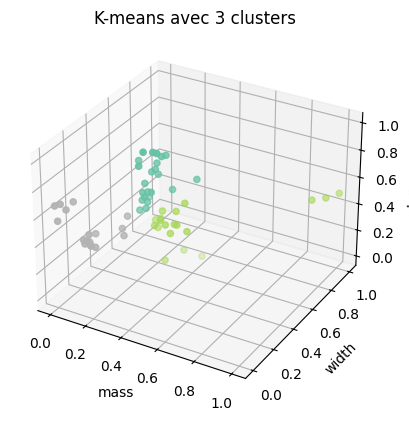

In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. Lire
df = pd.read_csv('fruit_data_with_colors.txt', sep='\t')

# 2. Garder seulement les colonnes chiffres
X = df[['mass', 'width', 'color_score']]

# 3. Normaliser entre 0 et 1
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

# 4. K-means avec 3 groupes
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X_norm)

# 5. Petit graphe 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_norm[:,0], X_norm[:,1], X_norm[:,2], c=labels, cmap='Set2')
ax.set_xlabel('mass')
ax.set_ylabel('width')
ax.set_zlabel('color_score')
plt.title(f'K-means avec {k} clusters')
plt.show()

**K-Means avec 4 groupes**

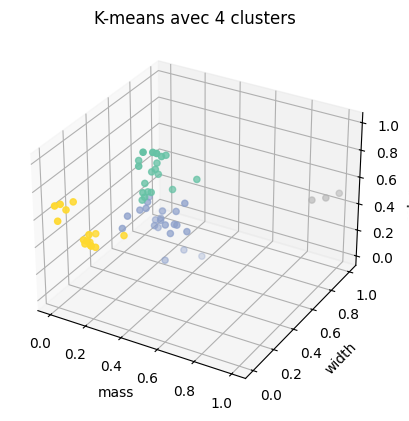

In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. Lire
df = pd.read_csv('fruit_data_with_colors.txt', sep='\t')

# 2. Garder seulement les colonnes chiffres
X = df[['mass', 'width', 'color_score']]

# 3. Normaliser entre 0 et 1
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)groupes

# 5. Petit graphe 3DPour chaque nombre de clusters (3, 4, 5), on compte combien de fruits de chaque vraie espèce tombent dans chaque cluster
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_norm[:,0], X_norm[:,1], X_norm[:,2], c=labels, cmap='Set2')
ax.set_xlabel('mass')
ax.set_ylabel('width')
ax.set_zlabel('color_score')
plt.title(f'K-means avec {k} clusters')
plt.show()

**K-Means avec 5 groupes**

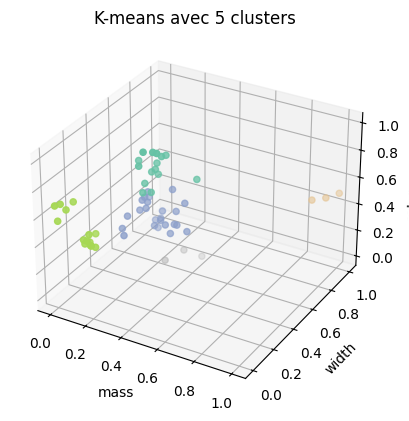

In [15]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. Lire
df = pd.read_csv('fruit_data_with_colors.txt', sep='\t')

# 2. Garder seulement les colonnes chiffres
X = df[['mass', 'width', 'color_score']]

# 3. Normaliser entre 0 et 1
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

# 4. K-means avec 3 groupes
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X_norm)

# 5. Petit graphe 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_norm[:,0], X_norm[:,1], X_norm[:,2], c=labels, cmap='Set2')
ax.set_xlabel('mass')
ax.set_ylabel('width')
ax.set_zlabel('color_score')
plt.title(f'K-means avec {k} clusters')
plt.show()

Interpréter, c’est faire la correspondance ! Voici une méthode pour créer un petit tableau « effectifs » et pourvoir interpréter sans difficultés. Pour chaque nombre de clusters (3, 4, 5), on compte combien de fruits de chaque vraie espèce tombent dans chaque cluster.

**Tableau « effectifs »**

In [16]:
import pandas as pd

for k in [3, 4, 5]:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_norm)
    labels = kmeans.labels_

    # Tableau de contingence
    tab = pd.crosstab(labels, df['fruit_name'])
    print(f'\n----- k = {k} -----')
    print(tab)


----- k = 3 -----
fruit_name  apple  lemon  mandarin  orange
row_0                                     
0              11      0         0      12
1               8      6         0       5
2               0     10         5       2

----- k = 4 -----
fruit_name  apple  lemon  mandarin  orange
row_0                                     
0              11      0         0       8
1               8      6         0       8
2               0     10         5       0
3               0      0         0       3

----- k = 5 -----
fruit_name  apple  lemon  mandarin  orange
row_0                                     
0              11      0         0       4
1               5      7         0      12
2               0      9         5       0
3               0      0         0       3
4               3      0         0       0


| k     | Ce qu’on observe                                                                                                                                                                                                                                               | Verdict                                                                               |
| ----- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------- |
| **3** | - **Cluster 0** : mélange « pommes + oranges » (11 vs 12) → **pas propre**  <br> - **Cluster 1** : encore un mélange (pommes, citrons, oranges)  <br> - **Cluster 2** : plutôt citrons + mandarines, mais 2 oranges traînent                                   | ❌ **Trop de chevauchement**                                                           |
| **4** | - **Cluster 0** : pommes majoritaires (11) + 8 oranges  <br> - **Cluster 1** : pommes (8) + oranges (8) + 6 citrons → **mélange**  <br> - **Cluster 2** : **100 % citrons & mandarines**  <br> - **Cluster 3** : **100 % oranges** (3 ex.)                     | ⚠️ **Mieux**, mais clusters 0 & 1 restent mélangés                                    |
| **5** | - **Cluster 0** : pommes (11) + 4 oranges  <br> - **Cluster 1** : gros paquet « oranges + citrons + qq pommes »  <br> - **Cluster 2** : **citron + mandarine** (propre)  <br> - **Cluster 3** : **orange pure** (3)  <br> - **Cluster 4** : **pomme pure** (3) | ⚠️ **Un peu plus fin**, mais **séparation globale pas nettement meilleure** que k = 4 |


Q3 - 2: Pour fixer le nombre de clusters, on propose d'utiliser la métrique R2 calculée suivant les
variances intra-classe et inter-classe. Cette métrique permet d'avoir une évaluation objective
de l'homogénéité des groupes construits artificiellement, sans avoir étiqueté manuellement
chaque instance. Un module R_square_clustering.py effectuant le calcul de R2 vous est fourni
sur le site du cours. Dessinez le graphe montrant l'évolution de cette métrique en faisant varier
le nombre de clusters entre 2 et 10. Comment varie R2 ? Quel est le nombre de clusters que
vous retiendriez ?

**Voici le code pour tracer de la courbe R²**

In [22]:
# code R_square_clustering.py
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import numpy as np

# compute r square for clustering
def r_square(data,centroids,labels,q):

    v_within = within_variance(data,centroids,labels,q)
    v_between = between_variance(data,centroids,labels,q)
    return v_between/(v_between+v_within)

# compute within variance
def within_variance(data,centroids,labels,q):
    res = 0.0
    for k in range(q):
        # get number of instances inside cluster k
        n_k = (labels==k).sum()

        # select rows of data associated with each cluster
        d_k = data[np.where(labels==k)]

        # sum squared distances between each point and its centroid
        sum = 0.0
        for vec_k in d_k:
            sum += np.sum(np.square(vec_k-centroids[k]))

        res += sum
    return res/len(data)


# compute between variance
def between_variance(data,centroids,labels,q):
    center = np.average(data,axis=0)

    res = 0.0

    for k in range(q):
        # get number of instances inside cluster k
        n_k = (labels==k).sum()

        # sum squared distances between global centroid and each cluster centroid
        res += n_k * np.sum(np.square(centroids[k]-center))

    return res/len(data)



# compute r square for clustering
def r_square(data,centroids,labels,q):
    v_within = within_variance(data,centroids,labels,q)
    v_between = between_variance(data,centroids,labels,q)
    return v_between/(v_between+v_within)


In [23]:
from google.colab import files
uploaded = files.upload()   # sélectionne R_square_clustering.py

In [20]:
import sys, os
sys.path.append(os.getcwd())   # Colab trouve maintenant le .py

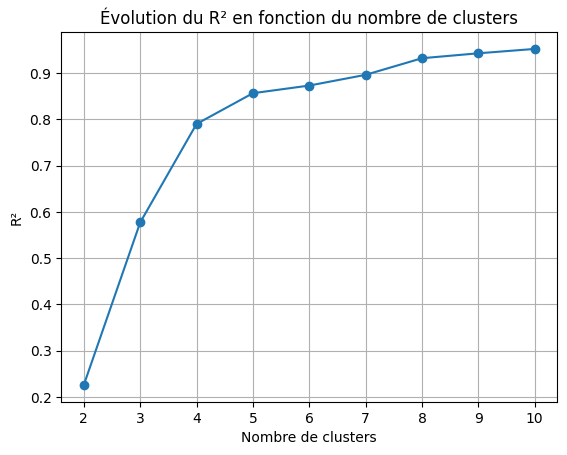

In [21]:
# ---------- TP1 : clustering K-means + courbe R² ----------
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from R_square_clustering import r_square   # fichier fourni

# 1. Lecture des données
df = pd.read_csv('fruit_data_with_colors.txt', sep='\t')

# 2. Sélection des colonnes numériques
X = df[['mass', 'width', 'color_score']]

# 3. Normalisation 0-1
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

# 4. Calcul du R² pour k de 2 à 10
k_range = range(2, 11)
r2_scores = []

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42).fit(X_norm)
    score = r_square(X_norm, km.cluster_centers_, km.labels_, k)
    r2_scores.append(score)

# 5. Tracé de la courbe
plt.plot(k_range, r2_scores, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('R²')
plt.title('Évolution du R² en fonction du nombre de clusters')
plt.grid(True)
plt.show()

R² croît très vite entre k = 2 et k = 4, puis la pente s’effondre : au-delà de 4 la courbe est quasi-plate.

Le coude (elbow) est donc situé en k = 4 : c’est le nombre de clusters optimal ; on ne gagne presque plus rien à en ajouter.

Il est possible d'obtenir une évaluation quantitative plus complète du clustering lorsque l'on
dispose des classes à obtenir dans les données (c'est un cas peu réaliste de l'apprentissage non
supervisé mais ici nous sommes dans la situation luxueuse où chaque instance est étiquetée).

Q3 - 3: Un module purity.py disponible sur le site du cours détermine un score de pureté en attribuant chaque cluster à la classe majoritaire. Utilisez-le pour tracer un graphe montrant l'évolution
de ce score en fonction du nombre de clusters variant entre 2 et 10. Quel est le nombre de
groupes que vous retiendriez suivant ce critère ?

In [ ]:
# code pour purity.py
#!/usr/bin/env python
# -*- coding: utf-8 -*-

from sklearn.metrics import accuracy_score
import numpy as np

def purity_score(y_true, y_pred):

    # matrix which will hold the majority-voted labels
    y_voted_labels = np.zeros(y_true.shape)
    # Ordering labels
    ## Labels might be missing e.g with set like 0,2 where 1 is missing
    ## First find the unique labels, then map the labels to an ordered set
    ## 0,2 should become 0,1
    labels = np.unique(y_true)
    ordered_labels = np.arange(labels.shape[0])
    for k in range(labels.shape[0]):
        y_true[y_true==labels[k]] = ordered_labels[k]
    # Update unique labels
    labels = np.unique(y_true)
    # We set the number of bins to be n_classes+2 so that
    # we count the actual occurence of classes between two consecutive bin
    # the bigger being excluded [bin_i, bin_i+1[
    bins = np.concatenate((labels, [np.max(labels)+1]), axis=0)

    for cluster in np.unique(y_pred):
        hist, _ = np.histogram(y_true[y_pred==cluster], bins=bins)
        # Find the most present label in the cluster
        winner = np.argmax(hist)
        y_voted_labels[y_pred==cluster] = winner

    return accuracy_score(y_true, y_voted_labels)
